# Assignment 2: Predicting Bike Sharing Demand Using Linear Regression

**Tasks**

**1. Preprocessing the Data**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/BikeSharingAssignment - BikeSharingAssignment.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of Duplicates:")
print(data.duplicated().sum())


Dataset Overview:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 2:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 3:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 4:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Missing Values Count:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count   

In [3]:
# Example for handling missing numerical values (if any exist)
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

# Example for handling missing categorical values (if any exist)
data['weather'] = data['weather'].fillna(data['weather'].mode()[0])

# Verify there are no more missing values
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values After Handling:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [4]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the updated dataset
print("\nDataset After Encoding:")
print(data_encoded.head())



Dataset After Encoding:
             datetime  temp   atemp  humidity  windspeed  casual  registered  \
0  2011-01-01 0:00:00  9.84  14.395        81        0.0       3          13   
1  2011-01-01 1:00:00  9.02  13.635        80        0.0       8          32   
2  2011-01-01 2:00:00  9.02  13.635        80        0.0       5          27   
3  2011-01-01 3:00:00  9.84  14.395        75        0.0       3          10   
4  2011-01-01 4:00:00  9.84  14.395        75        0.0       0           1   

   count  season_2  season_3  season_4  holiday_1  workingday_1  weather_2  \
0     16     False     False     False      False         False      False   
1     40     False     False     False      False         False      False   
2     32     False     False     False      False         False      False   
3     13     False     False     False      False         False      False   
4      1     False     False     False      False         False      False   

   weather_3  weather_4  

**2. Exploratory Data Analysis (EDA)**

# 2.1 Analyze the Target Variable

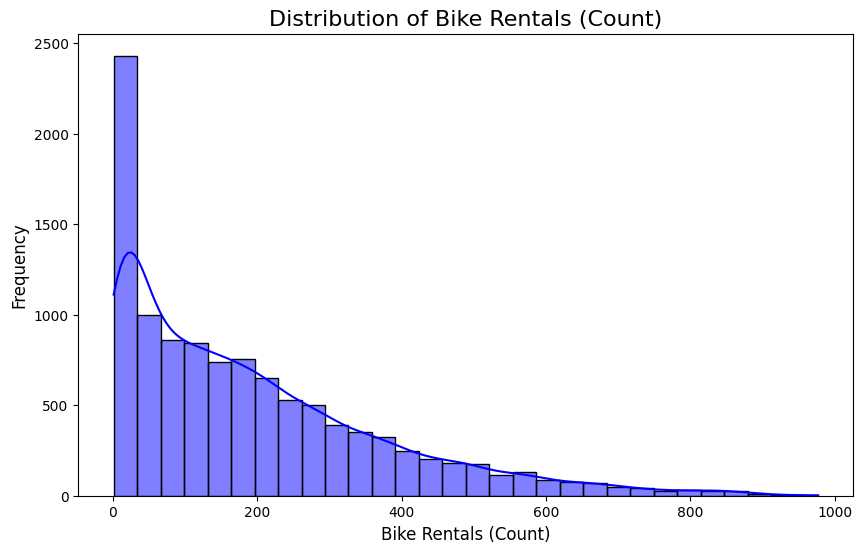

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'count'
plt.figure(figsize=(10, 6))
sns.histplot(data['count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bike Rentals (Count)', fontsize=16)
plt.xlabel('Bike Rentals (Count)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# 2.2 Analyze Relationships

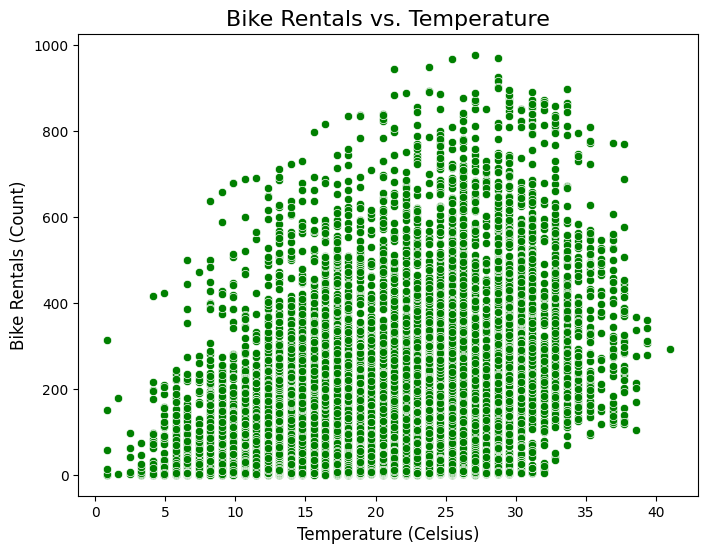

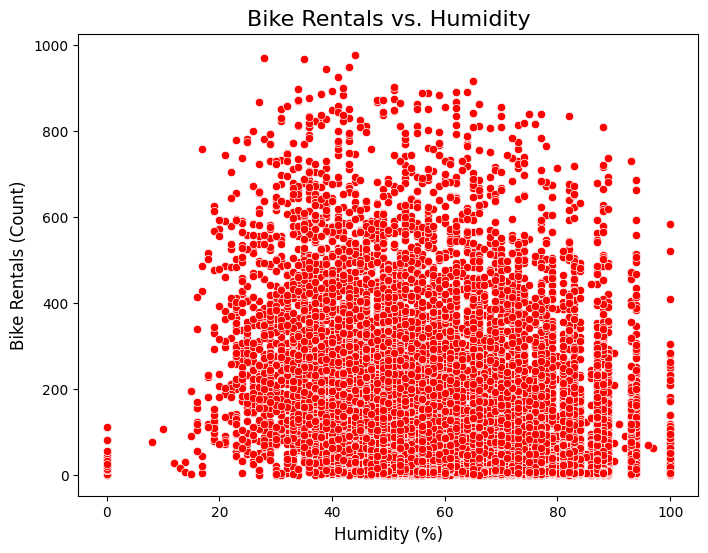

<ipython-input-7-570e51787e00>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=data, palette='coolwarm')


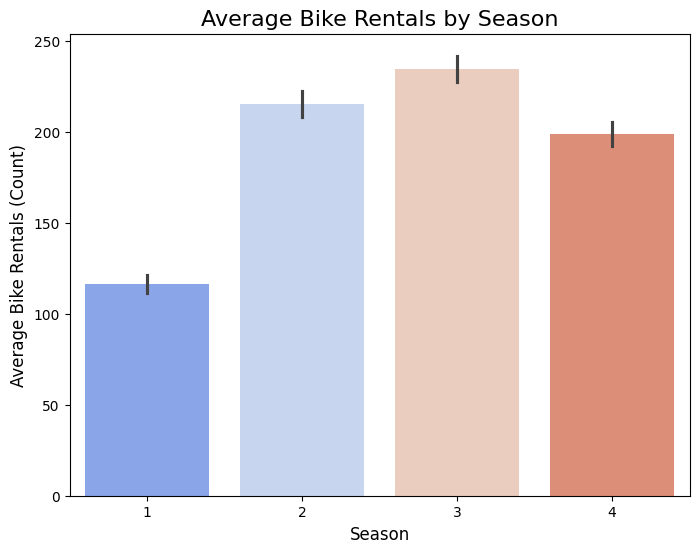

In [7]:
# Scatter plot: temperature vs. count
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['temp'], y=data['count'], color='green')
plt.title('Bike Rentals vs. Temperature', fontsize=16)
plt.xlabel('Temperature (Celsius)', fontsize=12)
plt.ylabel('Bike Rentals (Count)', fontsize=12)
plt.show()

# Scatter plot: humidity vs. count
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['humidity'], y=data['count'], color='red')
plt.title('Bike Rentals vs. Humidity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Bike Rentals (Count)', fontsize=12)
plt.show()

# Bar plot: average count by season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='count', data=data, palette='coolwarm')
plt.title('Average Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Bike Rentals (Count)', fontsize=12)
plt.show()


# 2.3 Correlation Analysis:

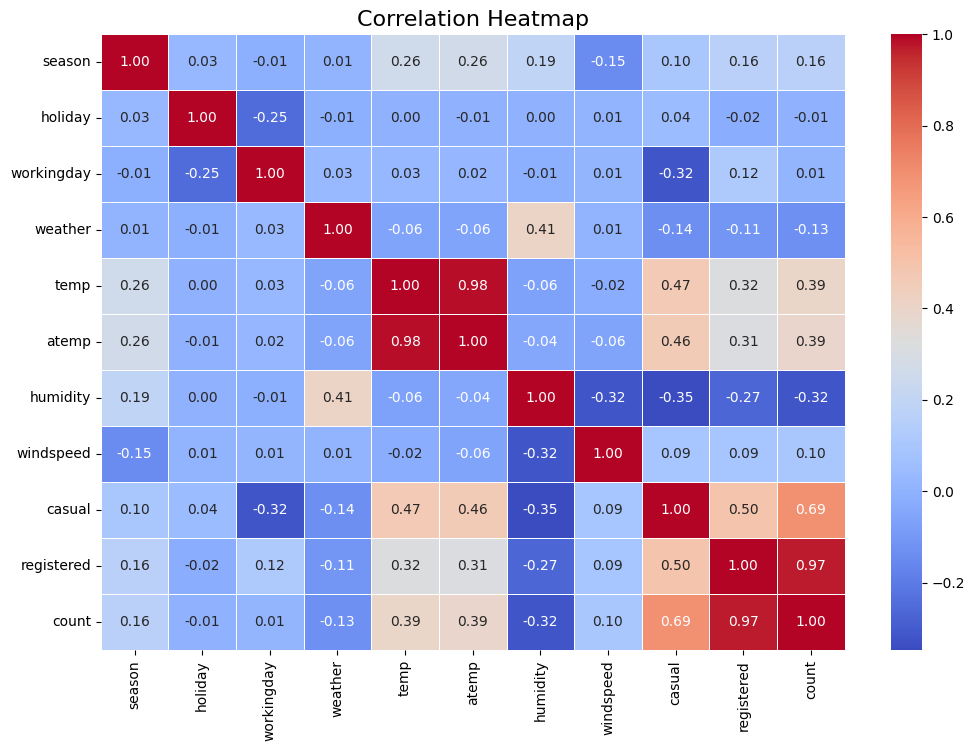

In [9]:
# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**3. Feature Engineering**

# 3.1 Create New Features

Ex 1 Extract Time-Based Features from datetime

In [10]:
# Convert 'datetime' to datetime object
data['datetime'] = pd.to_datetime(data['datetime'])

# Create new time-based features
data['hour'] = data['datetime'].dt.hour  # Extract hour
data['day_of_week'] = data['datetime'].dt.dayofweek  # Extract day of the week
data['month'] = data['datetime'].dt.month  # Extract month

# Display the updated dataset
print("New Features Added:")
print(data[['datetime', 'hour', 'day_of_week', 'month']].head())


New Features Added:
             datetime  hour  day_of_week  month
0 2011-01-01 00:00:00     0            5      1
1 2011-01-01 01:00:00     1            5      1
2 2011-01-01 02:00:00     2            5      1
3 2011-01-01 03:00:00     3            5      1
4 2011-01-01 04:00:00     4            5      1


Ex 2 Combine Existing Features

In [11]:
# Create a comfort index
data['comfort_index'] = data['temp'] - (0.55 * (1 - data['humidity'] / 100) * (data['temp'] - 14.5))

# Display the new feature
print("Comfort Index Added:")
print(data[['temp', 'humidity', 'comfort_index']].head())


Comfort Index Added:
   temp  humidity  comfort_index
0  9.84        81       10.32697
1  9.02        80        9.62280
2  9.02        80        9.62280
3  9.84        75       10.48075
4  9.84        75       10.48075


Ex 3 Categorize Hours into Day Periods

In [12]:
# Create time_of_day feature
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

data['time_of_day'] = data['hour'].apply(get_time_of_day)

# Display the new feature
print("Time of Day Feature Added:")
print(data[['hour', 'time_of_day']].head())


Time of Day Feature Added:
   hour time_of_day
0     0       night
1     1       night
2     2       night
3     3       night
4     4       night


# 3.2 Explain Feature Importance

New features like hour, day of the week, and month are introduced to capture temporal trends, as bike rentals vary significantly across time. For instance, rentals may peak during morning and evening rush hours, differ between weekdays and weekends, and show seasonal variations by month. The comfort index, which combines temperature and humidity, provides a single metric to gauge weather comfort, influencing rental behavior. Lastly, time of day groups hours into broader periods (morning, afternoon, evening, night), simplifying the model's understanding of temporal patterns. These features aim to improve model performance by capturing key behavioral and environmental factors affecting bike rentals.

**4. Build and Evaluate a Linear Regression Model**

# 4.1 Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

# Define the feature columns (exclude target and non-numeric columns)
feature_columns = ['temp', 'humidity', 'windspeed', 'season', 'weather', 'workingday', 'hour', 'day_of_week', 'comfort_index']
X = data[feature_columns]  # Features
y = data['count']  # Target variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data split successfully.")


Training and testing data split successfully.


# 4.2 Train the Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")


Linear Regression model trained successfully.


# 4.3 Evaluate the Model

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")


Model Performance:
MAE: 105.54
RMSE: 145.78
R² Score: 0.36


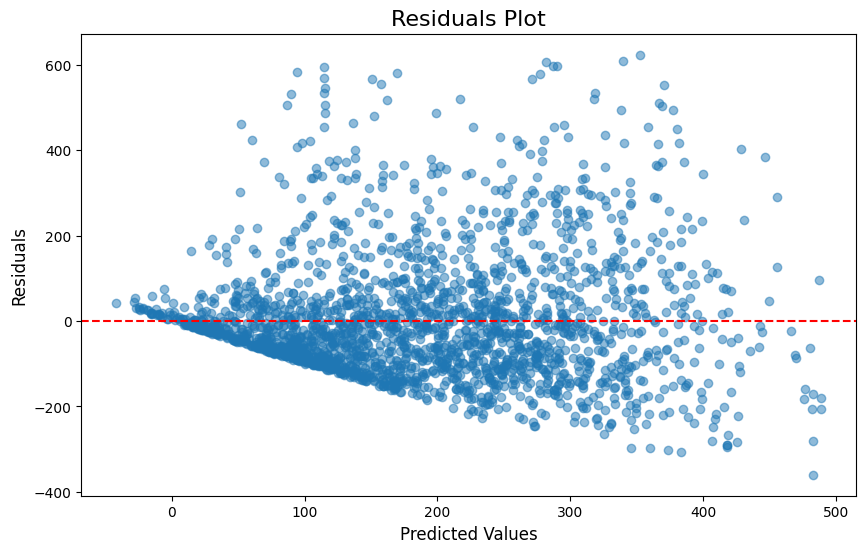

In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()


**Short Explaination**

Key Findings from EDA:
The EDA revealed that bike rentals increase with temperature and vary by season, with higher demand in summer and fall. Temporal features like hour and day_of_week showed strong patterns, such as peak rentals during commuting hours.

Impact of Feature Engineering:
Features like hour, time_of_day, and comfort_index improved the model by capturing temporal and weather-related trends. These features added valuable insights into user behavior and environmental impacts.

Model Performance and Challenges:
The Linear Regression model achieved MAE: 105.54, RMSE: 145.78, and R² Score: 0.36. While it captured some variability, the low R² and residuals pattern suggest it struggled with non-linear relationships. Advanced models could improve performance.

**Bonus Task**

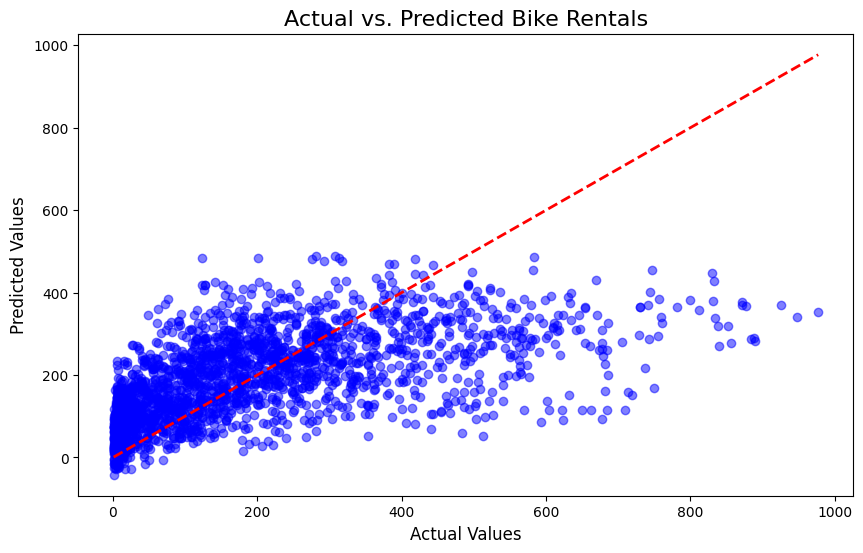

In [17]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Line of perfect predictions
plt.title('Actual vs. Predicted Bike Rentals', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show()
